In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Sri%20Lanka%20Travel%20Destination%20Data/complete_travel_destination_data.csv")

In [3]:
df.head()

,Type,Name,Address,Grade,District,AGA Division,PS/MC/UC,Full_Add,Lat,Lon
0,Restaurants,BAVARIAN BARN RESTAURANT,"NO. 11, GALLE FACE COURT 02 COLOMBO",A,Colombo,Colombo,Colombo Divisional Secretariat,"NO. 11, GALLE FACE COURT 02 COLOMBO, Colombo, ...",80.016670,6.866670
1,Restaurants,LORDS RESTAURANT,80B PORUTHOTA ROAD ETTHUKALA NEGOMBO,A,Gampaha,Negombo,Negombo Divisional Secretariat,"80B PORUTHOTA ROAD ETTHUKALA NEGOMBO, Gampaha,...",79.843249,7.206416
2,Restaurants,NIHONBASHI RESTAURANT,"NO 11, GALLE FACE TERRACE, COLOMBO 03",A,Colombo,Colombo,Colombo Divisional Secretariat,"NO 11, GALLE FACE TERRACE, COLOMBO 03, Colombo...",80.016670,6.866670
3,Restaurants,FREE WIND RESTAURANT & BAR,"NO 1285, KANDY ROAD, PALAIYOOTHU, TRINCO MALEE",A,Trincomalee,Uppuveli Trinco Malee,Trincomalee Divisional Secretariat,"NO 1285, KANDY ROAD, PALAIYOOTHU, TRINCO MALEE...",80.750000,7.250000
4,Restaurants,EDWIN RESTAURANT,"204, LEWIS PLACE, NEGOMBO",B,Gampaha,Negombo,Negombo Divisional Secretariat,"204, LEWIS PLACE, NEGOMBO, Gampaha, Sri Lanka",79.843249,7.206416


In [4]:
df.describe()

,Lat,Lon
count,1518.000000,1518.000000
mean,80.043295,7.009534
std,2.153123,1.285658
min,-2.781457,5.964618
25%,79.898096,6.866670
50%,80.016670,6.866670
75%,80.016670,7.031163
max,81.849686,53.954905


In [5]:
df.isnull().sum()

Type               0
Name               0
Address            0
Grade           1047
District           1
AGA Division       1
PS/MC/UC           1
Full_Add           1
Lat                5
Lon                5
dtype: int64

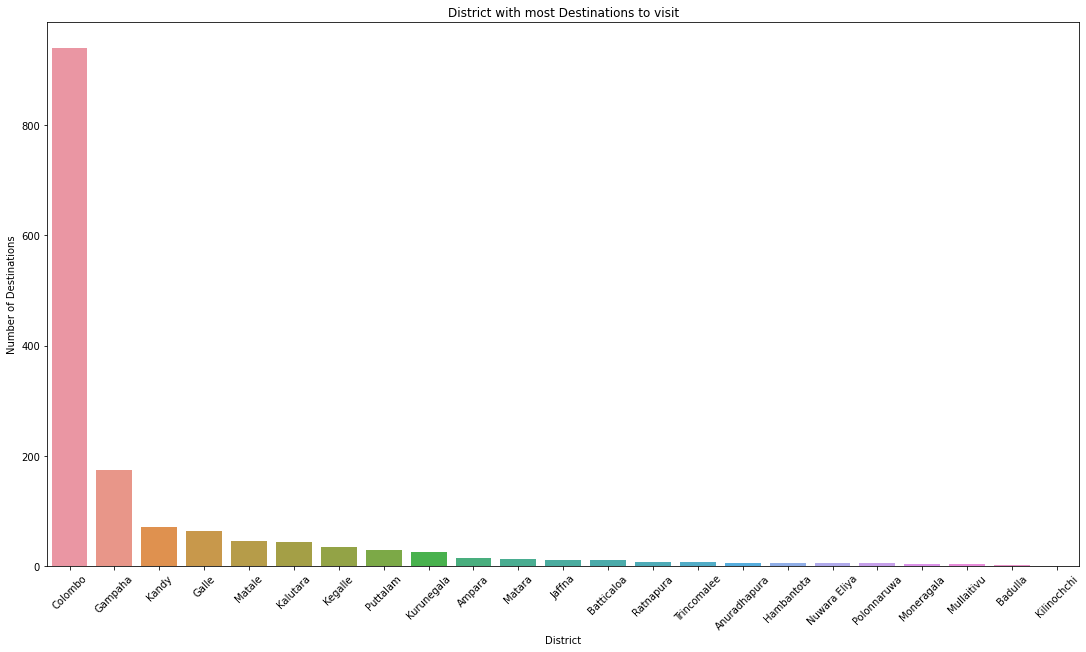

In [6]:
top_d_type = df[["Address", "District"]].groupby("District").agg(['count'])['Address']['count'].sort_values(ascending=False)
ax = sns.barplot( x = top_d_type.index, y = top_d_type.values)
ax.set_xticklabels(labels=top_d_type.index , rotation=45)
fig = plt.gcf()
fig.set_size_inches(18.5, 10, forward=True)
ax.set_ylabel("Number of Destinations")
ax.set_xlabel("District")
ax.set_title("District with most Destinations to visit");

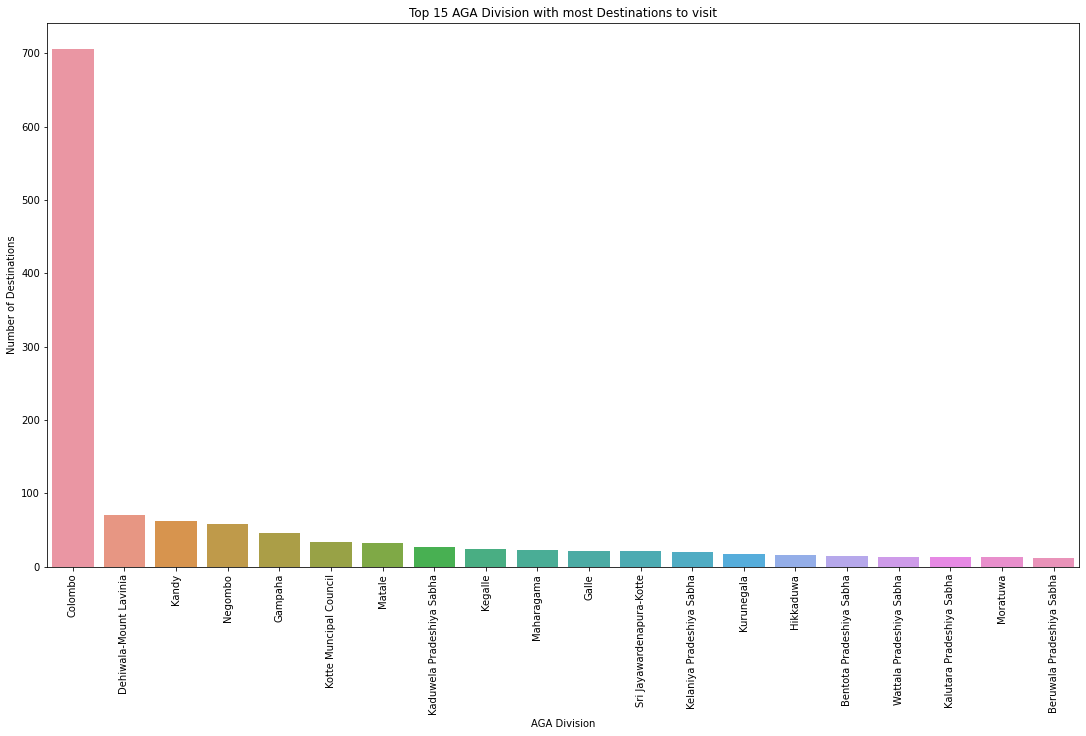

In [7]:
top_d_type = df[["Address", "AGA Division"]].groupby("AGA Division").agg(['count'])['Address']['count'].sort_values(ascending=False)[:20]
ax = sns.barplot( x = top_d_type.index, y = top_d_type.values)
ax.set_xticklabels(labels=top_d_type.index , rotation=90)
fig = plt.gcf()
fig.set_size_inches(18.5, 10, forward=True)
ax.set_ylabel("Number of Destinations")
ax.set_xlabel("AGA Division")
ax.set_title("Top 15 AGA Division with most Destinations to visit");

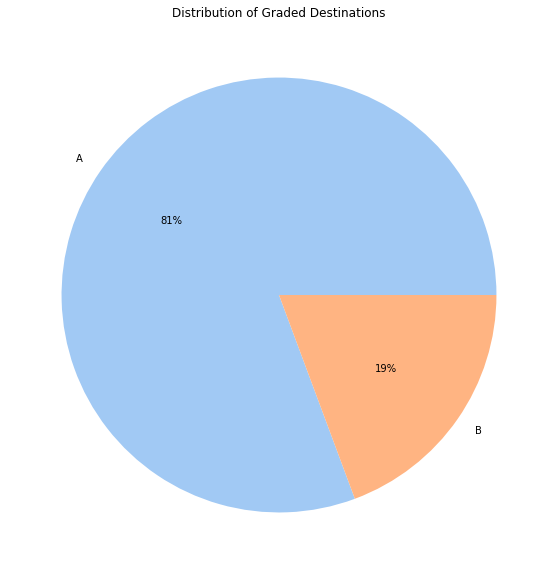

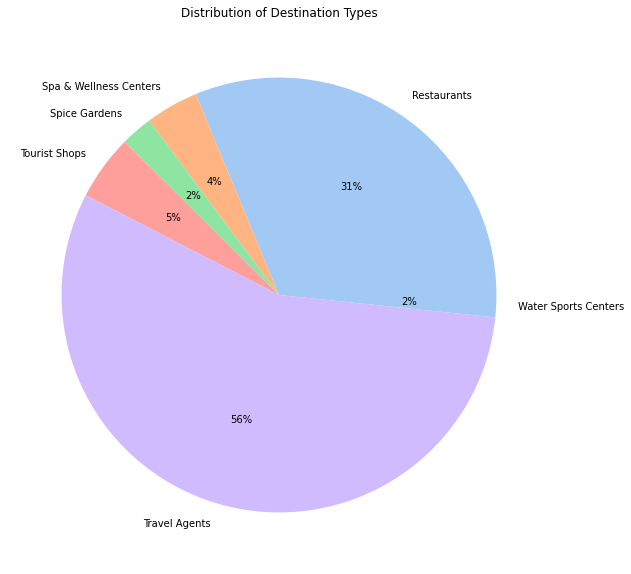

In [8]:
colors = sns.color_palette('pastel')[0:5]
df_grade = df[["Address", "Grade"]].groupby("Grade").agg(['count'])['Address']['count']
plt.pie(df_grade, labels = df_grade.index, colors = colors, autopct='%.0f%%')
fig = plt.gcf()
fig.set_size_inches(18.5, 10, forward=True)
plt.title("Distribution of Graded Destinations")
plt.show()

colors = sns.color_palette('pastel')[0:5]
df_dest = df[["Address", "Type"]].groupby("Type").agg(['count'])['Address']['count']
plt.pie(df_dest, labels = df_dest.index, colors = colors, autopct='%.0f%%')
fig = plt.gcf()
fig.set_size_inches(18.5, 10, forward=True)
plt.title("Distribution of Destination Types")
plt.show()

In [9]:
folium_map = folium.Map(location=[7.8731, 80.7718],
                        zoom_start=8,
                        tiles='CartoDB dark_matter')

df_map = df[df['Lat'].notna() & df['Lon'].notna() ]

FastMarkerCluster(data=list(zip(df_map['Lon'].values, df_map['Lat'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map